# GAN With MNIST Dataset(Tensorflow)

*Importing Necessary Libraries*

In [1]:
import os
import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tqdm import tqdm
from tensorflow.keras import layers

*Loading the Dataset*

In [2]:
(train_images, _), (_, _) = tf.keras.datasets.fashion_mnist.load_data()

train_images.shape

4422102/4422102 [==============================] - 0s 0us/step


(60000, 28, 28)

*Reshaping and changing dtype to float32 for training dataset*

In [4]:
train_images = train_images.reshape(train_images.shape[0],28,28,1).astype('float32')

train_images.shape

(60000, 28, 28, 1)

In [5]:
train_images[56782, :10, :10]  #Sample of Images

array([[[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  1.],
        [  1.],
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  1.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  1.],
        [  0.],
        [  0.],
        [  0.],
        [ 74.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  1.],
        [  0.],
        [  0.],
        [  0.],
        [ 77.],
        [207.]],

       [[  0.],
        [  0.],
        [  0.],
        [  1.],
        [  0.],
        [  0.],
        [124.],
        [176.],
        [192.],
        [180.]],

       [[  0.],
        [  0.],
        [  0.],
        [  1.],
        [  0.],
        [ 88.],
        [207.],
        [184.],
        [183.],
        [182.]],

       [[  0.],
        [  0

In [6]:
# Normalization / Rescaling of Images

train_images = (train_images -127.5)/127.5

train_images[56782, :10, :10]

array([[[-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-0.99215686],
        [-0.99215686],
        [-1.        ],
        [-1.        ],
        [-1.        ]],

       [[-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-0.99215686],
        [-1.        ],
        [-1.        ]],

       [[-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-0.99215686],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-0.41960785]],

       [[-1.        ],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-0.99215686],
        [-1.        ],
        [-1.        ],
        [-1.        ],
        [-0.39607844],
        [ 0.62352943]],

       [[-1.        ],
        [-1.        ],
        [-1.        ],
   

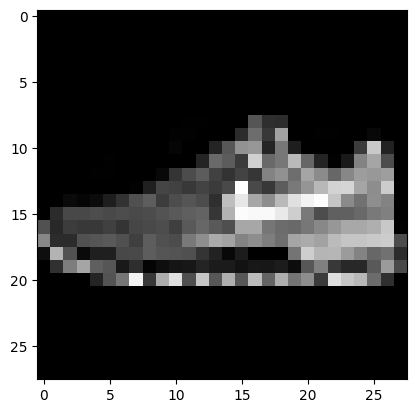

In [7]:
# Checking an Sample Image
plt.imshow(train_images[2567].squeeze(),cmap= 'gray')

In [8]:
#Shuffling Images and Batchsizing
buffer_size = 60000
batch_size = 128

In [9]:
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(buffer_size).batch(batch_size)

# Creating the Generator

In [10]:
def generator_model():
   model = tf.keras.Sequential()
   model.add(layers.Dense(64, input_dim=100))
   model.add(layers.ReLU())

   model.add(layers.Dense(128))
   model.add(layers.ReLU())

   model.add(layers.Dense(256))
   model.add(layers.ReLU())

   model.add(layers.Dense(784,activation='tanh'))
   model.add(layers.Reshape((28,28,1)))

   return model


In [11]:
generator = generator_model()
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                6464      
                                                                 
 re_lu (ReLU)                (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 re_lu_1 (ReLU)              (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 re_lu_2 (ReLU)              (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 784)               2

# Adding Random Vector Noise

In [19]:
noise = tf.random.normal([1,100])
generated_image = generator(noise, training=False)
generated_image.shape

TensorShape([1, 28, 28, 1])

*The Slicing of tensor is checked*

In [22]:
#print(generated_image)

In [23]:
#print(generated_image[0, :, :, 0])

*After Adding Random Vector Noise Epsilon on a Image*

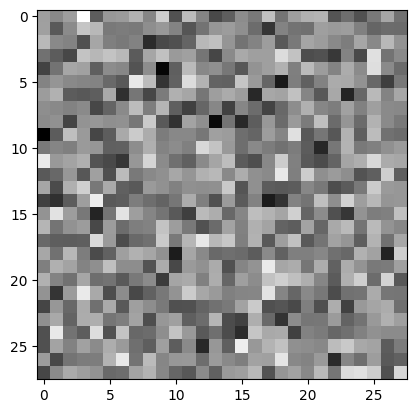

In [24]:
plt.imshow(generated_image[0, :, :, 0],cmap='gray')

#Creating Discriminator

In [28]:
def discriminator_model():
  model = tf.keras.Sequential()
  model.add(layers.Input(shape=(28,28,1)))
  model.add(layers.Flatten())

  model.add(layers.Dense(256))
  model.add(layers.LeakyReLU(0.2))
  model.add(layers.Dropout(0.5))

  model.add(layers.Dense(64))
  model.add(layers.LeakyReLU(0.2))
  model.add(layers.Dropout(0.3))

  model.add(layers.Dense(64))
  model.add(layers.LeakyReLU(0.2))
  model.add(layers.Dropout(0.2))

  model.add(layers.Dense(1,activation='sigmoid'))
  return model

In [29]:
discriminator = discriminator_model()
discriminator.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               200960    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 256)               0         
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 64)                16448     
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 64)                0         
                                                                 
 dropout_3 (Dropout)         (None, 64)               

*Model Performance on the Image*

In [30]:
output = discriminator(generated_image)
print(output)

tf.Tensor([[0.49691707]], shape=(1, 1), dtype=float32)


*Defining Loss BCE*<br><br>For Creating Discriminator And Generator Loss

In [31]:
bce = tf.keras.losses.BinaryCrossentropy()

In [32]:
def discriminator_loss(real_output, fake_output):
  real_loss = bce(tf.ones_like(real_output), real_output)
  fake_loss = bce(tf.zeros_like(fake_output),fake_output)
  total_loss = real_loss + fake_loss
  return total_loss

In [33]:
def generator_loss(fake_output):
  gen_loss = bce(tf.ones_like(fake_output), fake_output)
  return gen_loss

*Adding Optimizer for Generator and Discriminator*

In [34]:
generator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)


*Saving the checkpoint of Model Progress*

In [35]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')
checkpoint = tf.train.Checkpoint(generator_optimizer = generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [36]:
epochs =50
noise_dim =100
num_examples_to_generate = 16

seed = tf.random.normal([num_examples_to_generate, noise_dim])

Input:

images: Real images from the dataset.
Generate Fake Images:

<b>Generate fake images using the generator model by providing random noise (noise).
Discriminator Evaluation:</b>

Use the discriminator to evaluate both real and fake images.
real_output: Discriminator's output for real images.
fake_output: Discriminator's output for generated (fake) images.
Loss Calculation:

<b>Calculate the generator loss (gen_loss) and discriminator loss (disc_loss) using defined loss functions (generator_loss and discriminator_loss).
Gradient Calculation:</b>

<h3>Use TensorFlow's automatic differentiation (GradientTape) to calculate gradients of generator and discriminator losses with respect to their trainable variables.
Optimizer Update:</h3>

Apply the calculated gradients to update the parameters (trainable variables) of both the generator and discriminator using their respective optimizers (generator_optimizer and discriminator_optimizer).
Return:

<b>Return a tuple containing the generator loss, discriminator loss, mean real output, and mean fake output. This information can be useful for monitoring and analysis during training.</b>

In [59]:
@tf.function
def train_step(images):
    noise = tf.random.normal([batch_size, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training = True)

        real_output = discriminator(images, training = True)
        fake_output = discriminator(generated_images, training = True)

        disc_loss = discriminator_loss(real_output, fake_output)
        gen_loss = generator_loss(fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return (gen_loss, disc_loss, tf.reduce_mean(real_output), tf.reduce_mean(fake_output))


In [60]:
def generate_and_plot_images(model, epoch, test_input):

    predictions = model(test_input, training = False)

    fig = plt.figure(figsize = (8, 4))

    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        pred = (predictions[i, :, :, 0] + 1) * 127.5
        pred = np.array(pred)
        plt.imshow(pred.astype(np.uint8), cmap = 'gray')
        plt.axis('off')

    plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
    plt.show()

In [61]:
def train(dataset, epochs):

    gen_loss_list = []
    disc_loss_list = []

    real_score_list =[]
    fake_score_list =[]
    for epoch in tqdm(range(epochs)):
        start = time.time()
        num_batches = len(dataset)

        print(f'Training started with  epoch {epoch + 1} with {num_batches} batches...')

        total_gen_loss = 0
        total_disc_loss = 0

        for batch in dataset:
            generator_loss, discriminator_loss, real_score, fake_score = train_step(batch)
            total_gen_loss += generator_loss
            total_disc_loss += discriminator_loss

        mean_gen_loss = total_gen_loss / num_batches
        mean_disc_loss = total_disc_loss / num_batches

        print('Losses after epoch %5d: generator %.3f, discriminator %.3f, real_score %.2f%%, fake_score %.2f%%'  %
              (epoch + 1, generator_loss, discriminator_loss, real_score * 100, fake_score * 100))

        generate_and_plot_images(generator, epoch + 1, seed)

        gen_loss_list.append(mean_gen_loss)
        disc_loss_list.append(mean_disc_loss)
        real_score_list.append(real_score)
        fake_score_list.append(fake_score)

        if (epoch + 1) % 10 == 0:
              checkpoint.save(file_prefix = checkpoint_prefix)

        print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))


    return  gen_loss_list, disc_loss_list, real_score_list, fake_score_list

  0%|          | 0/50 [00:00<?, ?it/s]

Training started with  epoch 1 with 469 batches...
Losses after epoch     1: generator 3.934, discriminator 0.221, real_score 94.35%, fake_score 7.76%


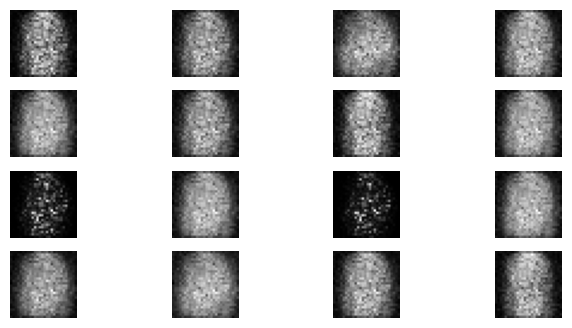

  2%|▏         | 1/50 [00:08<07:05,  8.68s/it]

Time for epoch 1 is 8.676737070083618 sec
Training started with  epoch 2 with 469 batches...
Losses after epoch     2: generator 3.480, discriminator 0.310, real_score 89.03%, fake_score 10.09%


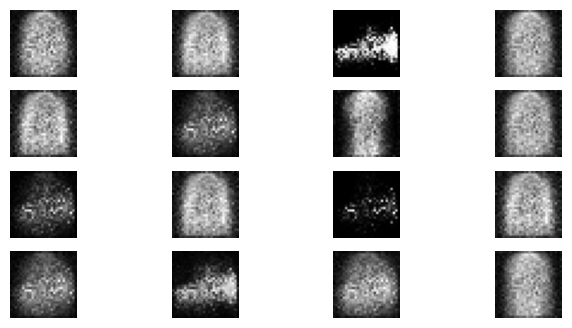

  4%|▍         | 2/50 [00:11<04:04,  5.10s/it]

Time for epoch 2 is 2.5914807319641113 sec
Training started with  epoch 3 with 469 batches...
Losses after epoch     3: generator 3.777, discriminator 0.367, real_score 91.85%, fake_score 13.28%


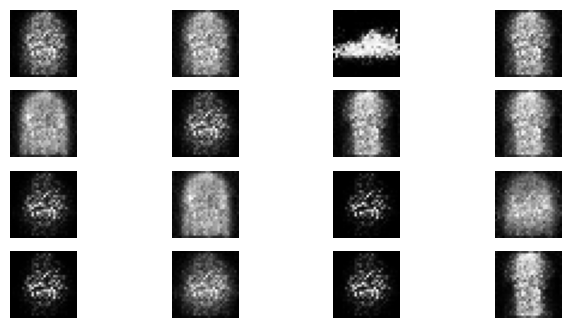

  6%|▌         | 3/50 [00:14<03:11,  4.07s/it]

Time for epoch 3 is 2.8443281650543213 sec
Training started with  epoch 4 with 469 batches...
Losses after epoch     4: generator 1.806, discriminator 0.604, real_score 87.26%, fake_score 24.15%


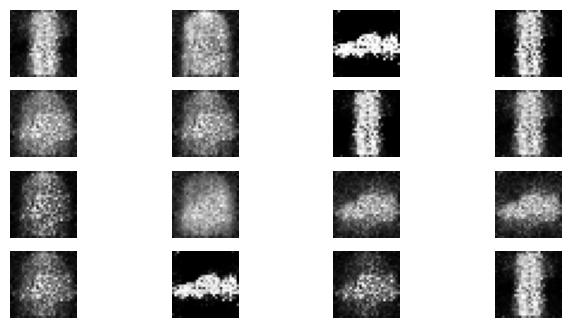

  8%|▊         | 4/50 [00:17<02:53,  3.77s/it]

Time for epoch 4 is 3.3014445304870605 sec
Training started with  epoch 5 with 469 batches...
Losses after epoch     5: generator 3.156, discriminator 0.606, real_score 79.76%, fake_score 12.88%


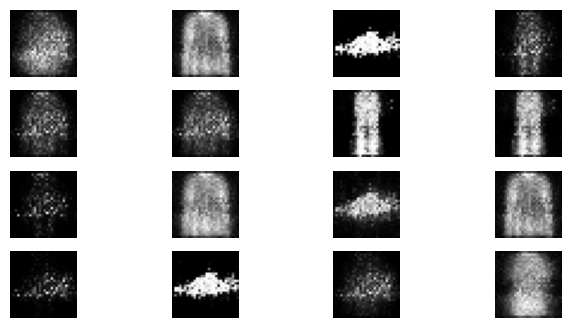

 10%|█         | 5/50 [00:23<03:19,  4.43s/it]

Time for epoch 5 is 5.598569393157959 sec
Training started with  epoch 6 with 469 batches...
Losses after epoch     6: generator 2.705, discriminator 0.427, real_score 85.70%, fake_score 13.77%


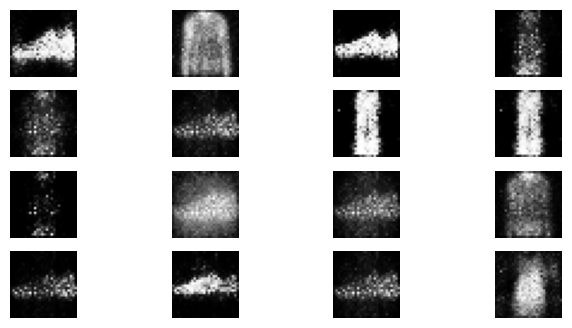

 12%|█▏        | 6/50 [00:25<02:46,  3.79s/it]

Time for epoch 6 is 2.5261619091033936 sec
Training started with  epoch 7 with 469 batches...
Losses after epoch     7: generator 2.446, discriminator 0.628, real_score 76.70%, fake_score 15.47%


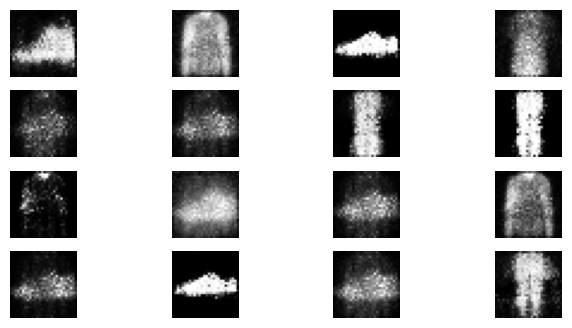

 14%|█▍        | 7/50 [00:28<02:32,  3.54s/it]

Time for epoch 7 is 3.0393226146698 sec
Training started with  epoch 8 with 469 batches...
Losses after epoch     8: generator 2.745, discriminator 0.306, real_score 91.41%, fake_score 15.30%


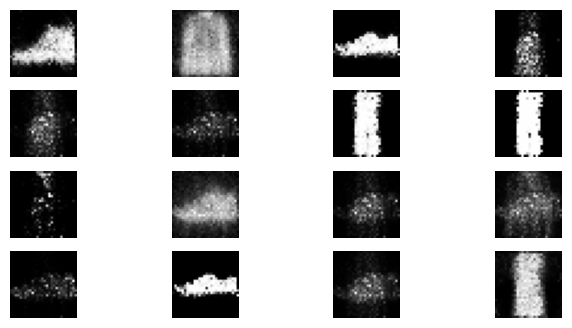

 16%|█▌        | 8/50 [00:31<02:24,  3.44s/it]

Time for epoch 8 is 3.215038776397705 sec
Training started with  epoch 9 with 469 batches...
Losses after epoch     9: generator 2.497, discriminator 0.704, real_score 80.20%, fake_score 16.31%


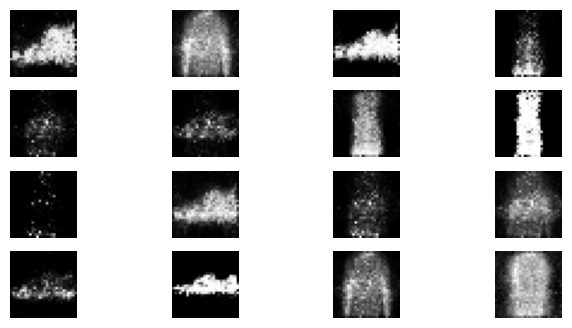

 18%|█▊        | 9/50 [00:35<02:22,  3.47s/it]

Time for epoch 9 is 3.535010576248169 sec
Training started with  epoch 10 with 469 batches...
Losses after epoch    10: generator 1.750, discriminator 0.857, real_score 74.30%, fake_score 25.80%


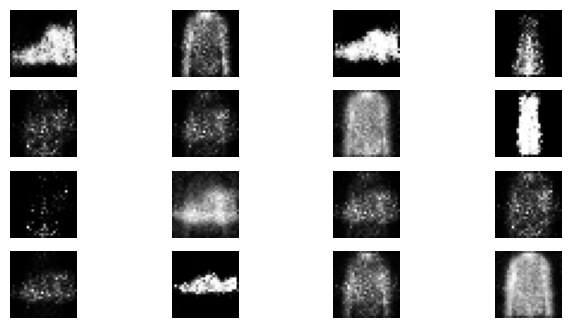

 20%|██        | 10/50 [00:38<02:11,  3.29s/it]

Time for epoch 10 is 2.880377769470215 sec
Training started with  epoch 11 with 469 batches...
Losses after epoch    11: generator 1.801, discriminator 0.692, real_score 77.63%, fake_score 23.36%


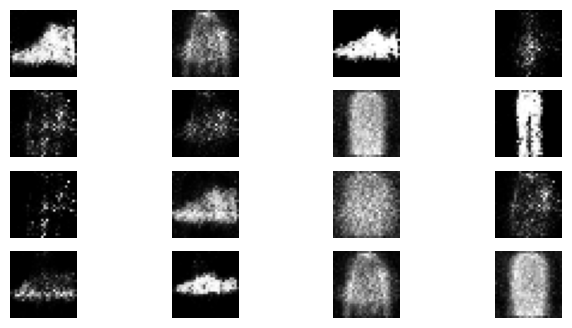

 22%|██▏       | 11/50 [00:40<01:59,  3.06s/it]

Time for epoch 11 is 2.5359911918640137 sec
Training started with  epoch 12 with 469 batches...
Losses after epoch    12: generator 2.642, discriminator 0.746, real_score 70.39%, fake_score 14.66%


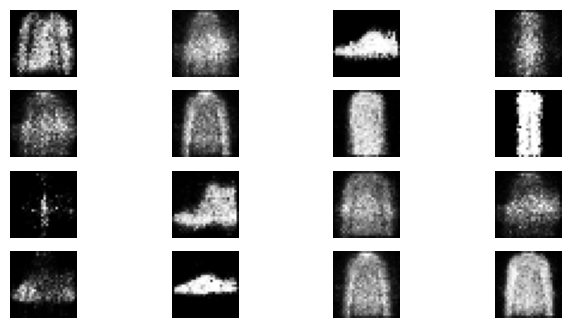

 24%|██▍       | 12/50 [00:43<01:50,  2.91s/it]

Time for epoch 12 is 2.551302671432495 sec
Training started with  epoch 13 with 469 batches...
Losses after epoch    13: generator 1.794, discriminator 0.669, real_score 81.04%, fake_score 26.66%


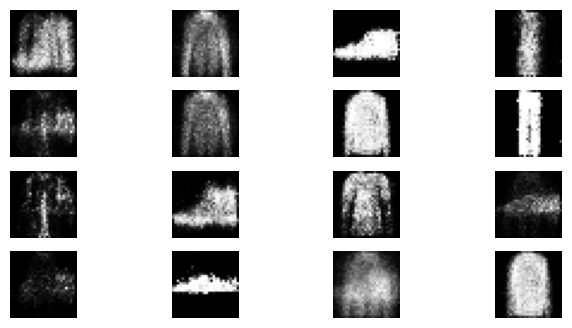

 26%|██▌       | 13/50 [00:46<01:48,  2.93s/it]

Time for epoch 13 is 2.974776268005371 sec
Training started with  epoch 14 with 469 batches...
Losses after epoch    14: generator 2.097, discriminator 0.814, real_score 73.19%, fake_score 21.79%


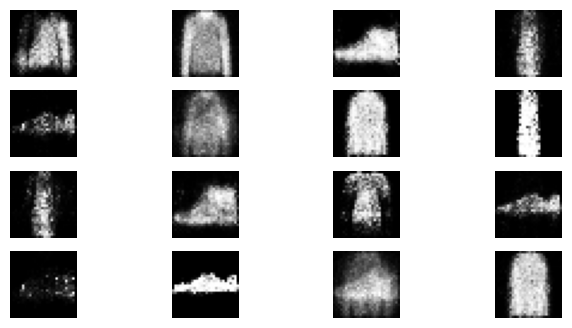

 28%|██▊       | 14/50 [00:50<02:02,  3.40s/it]

Time for epoch 14 is 4.484452962875366 sec
Training started with  epoch 15 with 469 batches...
Losses after epoch    15: generator 2.019, discriminator 0.658, real_score 76.19%, fake_score 22.14%


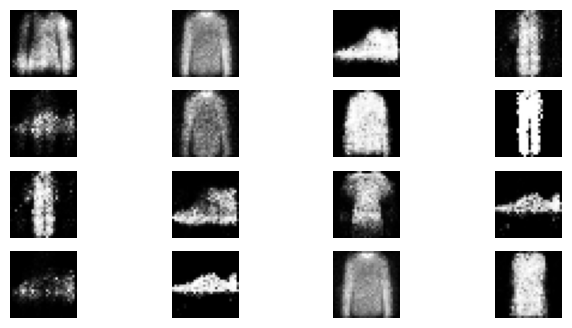

 30%|███       | 15/50 [00:53<01:53,  3.24s/it]

Time for epoch 15 is 2.865856885910034 sec
Training started with  epoch 16 with 469 batches...
Losses after epoch    16: generator 1.410, discriminator 0.765, real_score 75.77%, fake_score 29.15%


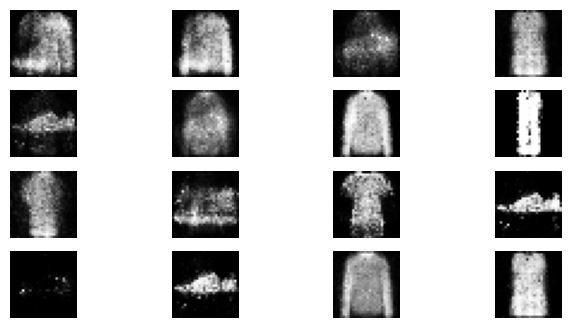

 32%|███▏      | 16/50 [00:56<01:44,  3.06s/it]

Time for epoch 16 is 2.6412882804870605 sec
Training started with  epoch 17 with 469 batches...
Losses after epoch    17: generator 2.213, discriminator 0.500, real_score 85.05%, fake_score 19.93%


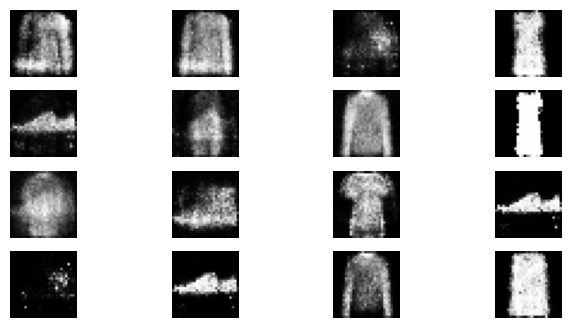

 34%|███▍      | 17/50 [00:59<01:39,  3.03s/it]

Time for epoch 17 is 2.932795524597168 sec
Training started with  epoch 18 with 469 batches...
Losses after epoch    18: generator 2.034, discriminator 0.725, real_score 75.16%, fake_score 21.38%


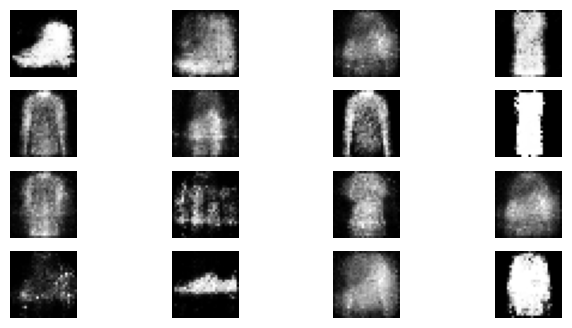

 36%|███▌      | 18/50 [01:01<01:33,  2.93s/it]

Time for epoch 18 is 2.7018826007843018 sec
Training started with  epoch 19 with 469 batches...
Losses after epoch    19: generator 1.169, discriminator 0.996, real_score 76.98%, fake_score 38.67%


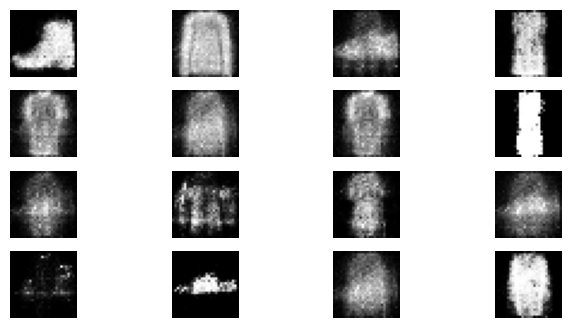

 38%|███▊      | 19/50 [01:07<01:55,  3.74s/it]

Time for epoch 19 is 5.629965782165527 sec
Training started with  epoch 20 with 469 batches...
Losses after epoch    20: generator 1.652, discriminator 0.909, real_score 70.78%, fake_score 26.19%


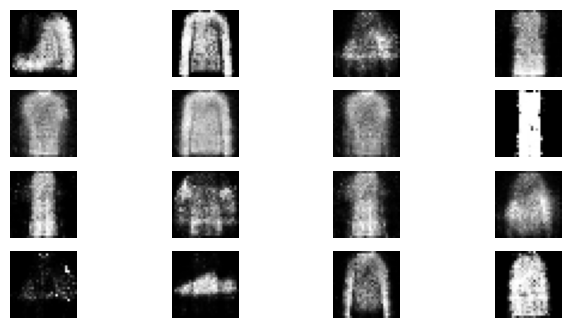

 40%|████      | 20/50 [01:10<01:44,  3.49s/it]

Time for epoch 20 is 2.8861048221588135 sec
Training started with  epoch 21 with 469 batches...
Losses after epoch    21: generator 1.927, discriminator 0.845, real_score 74.74%, fake_score 25.25%


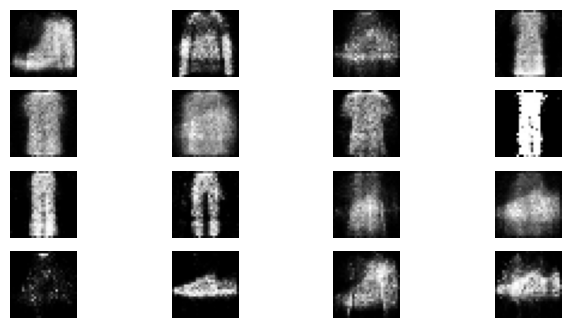

 42%|████▏     | 21/50 [01:13<01:36,  3.33s/it]

Time for epoch 21 is 2.979602575302124 sec
Training started with  epoch 22 with 469 batches...
Losses after epoch    22: generator 1.662, discriminator 0.756, real_score 77.09%, fake_score 26.13%


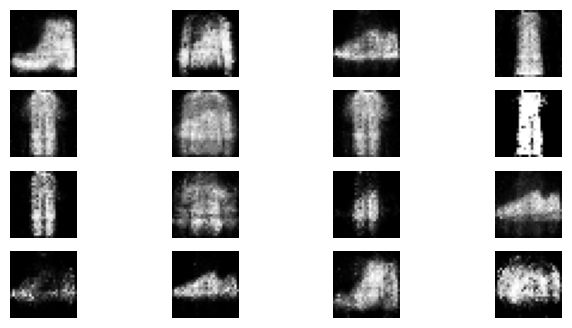

 44%|████▍     | 22/50 [01:16<01:29,  3.19s/it]

Time for epoch 22 is 2.8340628147125244 sec
Training started with  epoch 23 with 469 batches...
Losses after epoch    23: generator 1.688, discriminator 0.950, real_score 74.26%, fake_score 27.28%


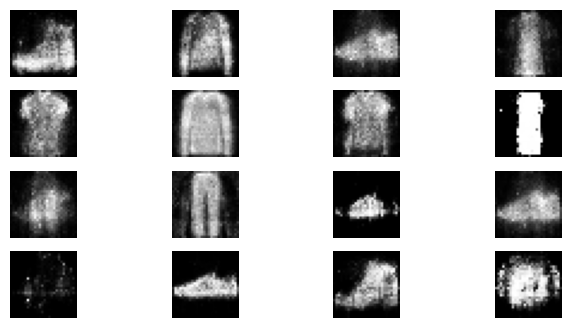

 46%|████▌     | 23/50 [01:20<01:30,  3.33s/it]

Time for epoch 23 is 3.6744682788848877 sec
Training started with  epoch 24 with 469 batches...
Losses after epoch    24: generator 1.887, discriminator 0.776, real_score 72.13%, fake_score 21.02%


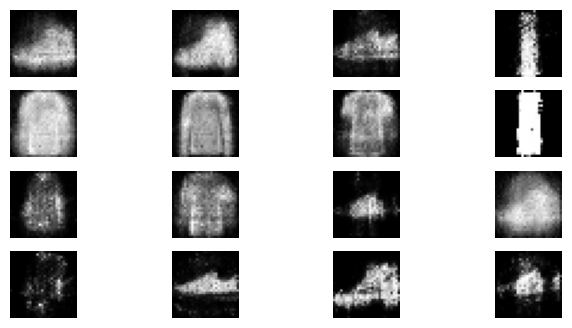

 48%|████▊     | 24/50 [01:23<01:25,  3.29s/it]

Time for epoch 24 is 3.17456316947937 sec
Training started with  epoch 25 with 469 batches...
Losses after epoch    25: generator 1.871, discriminator 0.729, real_score 75.53%, fake_score 23.12%


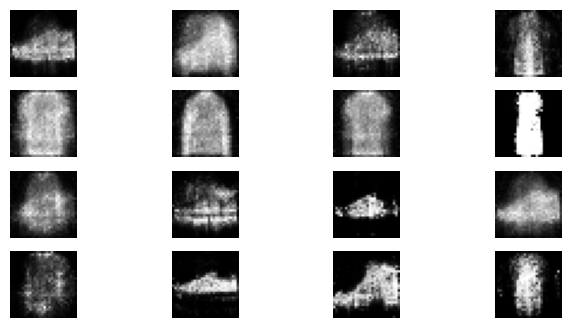

 50%|█████     | 25/50 [01:25<01:17,  3.11s/it]

Time for epoch 25 is 2.684047222137451 sec
Training started with  epoch 26 with 469 batches...
Losses after epoch    26: generator 1.892, discriminator 0.819, real_score 71.34%, fake_score 23.55%


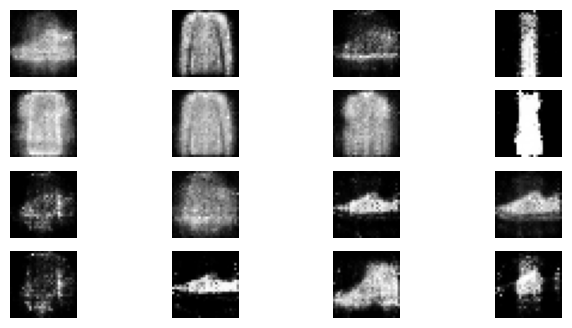

 52%|█████▏    | 26/50 [01:28<01:13,  3.05s/it]

Time for epoch 26 is 2.9206666946411133 sec
Training started with  epoch 27 with 469 batches...
Losses after epoch    27: generator 1.864, discriminator 0.700, real_score 75.75%, fake_score 22.39%


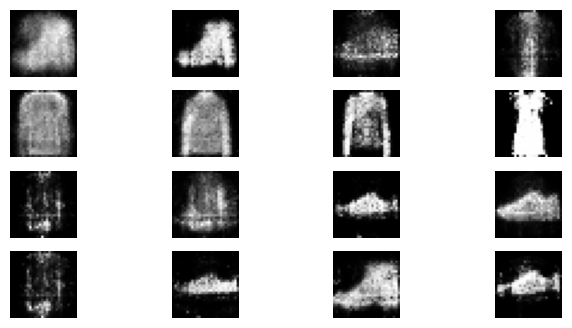

 54%|█████▍    | 27/50 [01:31<01:07,  2.94s/it]

Time for epoch 27 is 2.672096014022827 sec
Training started with  epoch 28 with 469 batches...
Losses after epoch    28: generator 1.736, discriminator 1.272, real_score 65.64%, fake_score 29.46%


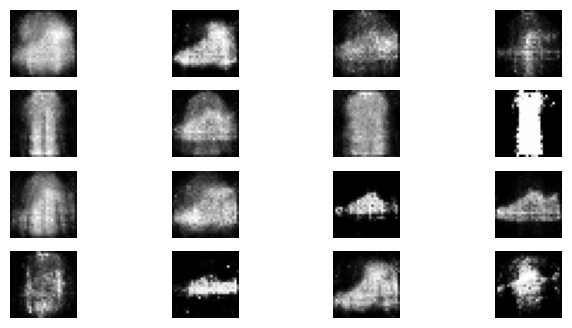

 56%|█████▌    | 28/50 [01:34<01:07,  3.09s/it]

Time for epoch 28 is 3.4298839569091797 sec
Training started with  epoch 29 with 469 batches...
Losses after epoch    29: generator 1.503, discriminator 0.873, real_score 71.20%, fake_score 29.12%


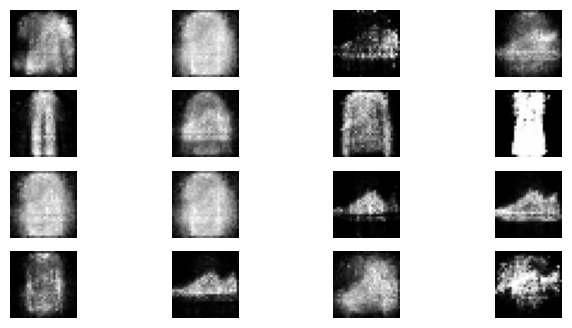

 58%|█████▊    | 29/50 [01:38<01:06,  3.17s/it]

Time for epoch 29 is 3.3554813861846924 sec
Training started with  epoch 30 with 469 batches...
Losses after epoch    30: generator 2.270, discriminator 0.856, real_score 73.65%, fake_score 22.74%


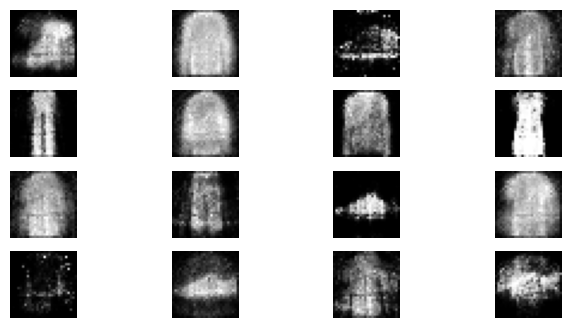

 60%|██████    | 30/50 [01:41<01:02,  3.13s/it]

Time for epoch 30 is 3.0387911796569824 sec
Training started with  epoch 31 with 469 batches...
Losses after epoch    31: generator 1.633, discriminator 0.941, real_score 73.50%, fake_score 29.67%


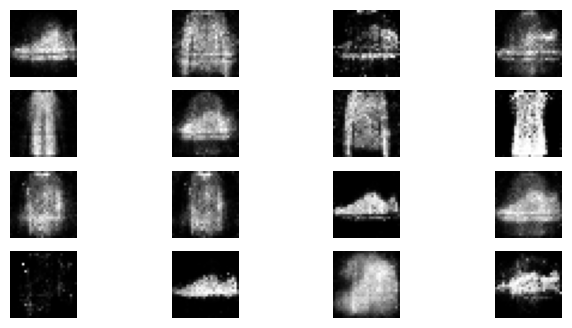

 62%|██████▏   | 31/50 [01:43<00:56,  2.98s/it]

Time for epoch 31 is 2.611417770385742 sec
Training started with  epoch 32 with 469 batches...
Losses after epoch    32: generator 1.912, discriminator 0.675, real_score 79.65%, fake_score 23.01%


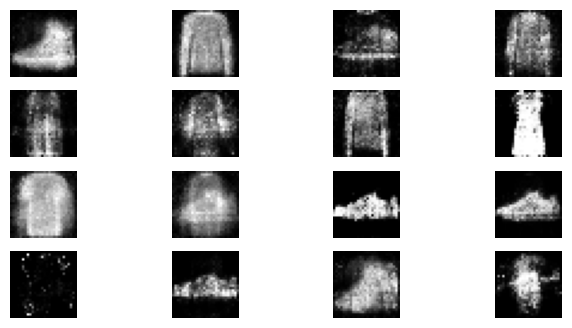

 64%|██████▍   | 32/50 [01:46<00:51,  2.88s/it]

Time for epoch 32 is 2.6657538414001465 sec
Training started with  epoch 33 with 469 batches...
Losses after epoch    33: generator 1.860, discriminator 0.621, real_score 80.09%, fake_score 24.10%


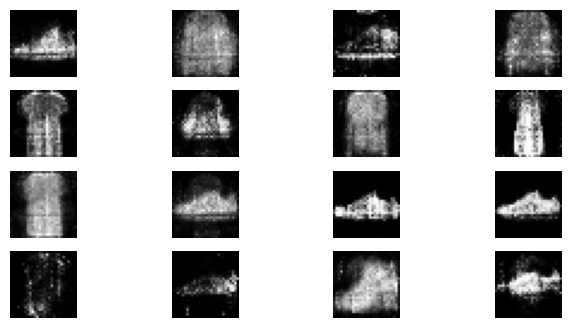

 66%|██████▌   | 33/50 [01:49<00:51,  3.01s/it]

Time for epoch 33 is 3.295518636703491 sec
Training started with  epoch 34 with 469 batches...
Losses after epoch    34: generator 1.154, discriminator 1.098, real_score 69.96%, fake_score 40.63%


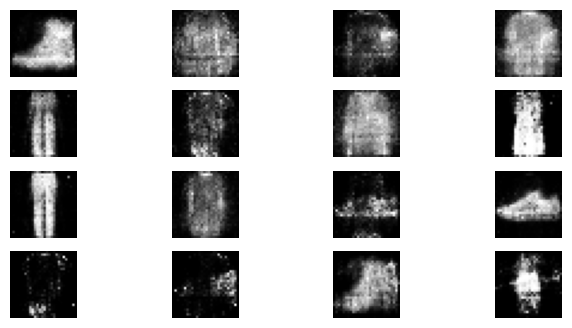

 68%|██████▊   | 34/50 [01:53<00:50,  3.16s/it]

Time for epoch 34 is 3.519667863845825 sec
Training started with  epoch 35 with 469 batches...
Losses after epoch    35: generator 1.249, discriminator 1.021, real_score 71.86%, fake_score 36.35%


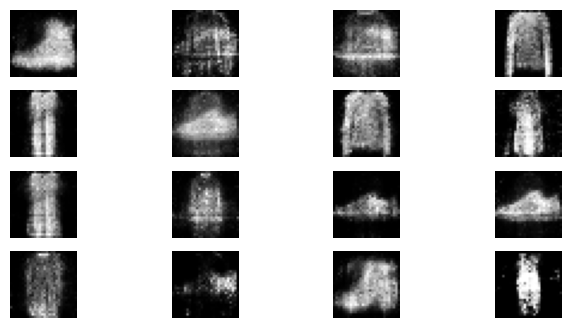

 70%|███████   | 35/50 [01:56<00:46,  3.10s/it]

Time for epoch 35 is 2.9550788402557373 sec
Training started with  epoch 36 with 469 batches...
Losses after epoch    36: generator 1.541, discriminator 0.689, real_score 77.65%, fake_score 27.45%


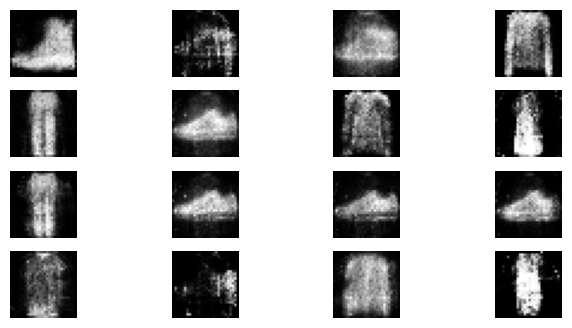

 72%|███████▏  | 36/50 [01:58<00:41,  2.95s/it]

Time for epoch 36 is 2.605417251586914 sec
Training started with  epoch 37 with 469 batches...
Losses after epoch    37: generator 2.712, discriminator 0.593, real_score 80.58%, fake_score 16.15%


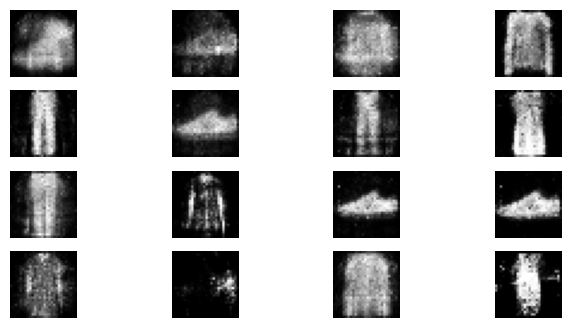

 74%|███████▍  | 37/50 [02:01<00:37,  2.86s/it]

Time for epoch 37 is 2.633578062057495 sec
Training started with  epoch 38 with 469 batches...
Losses after epoch    38: generator 1.802, discriminator 0.844, real_score 71.77%, fake_score 25.83%


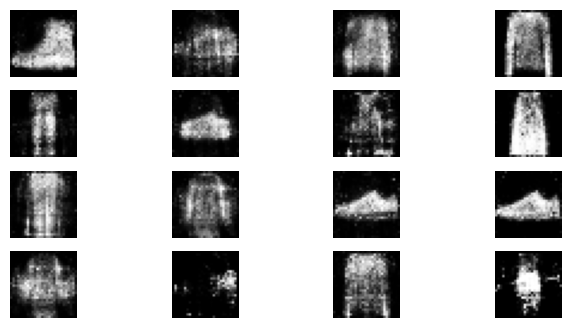

 76%|███████▌  | 38/50 [02:04<00:34,  2.90s/it]

Time for epoch 38 is 2.9876322746276855 sec
Training started with  epoch 39 with 469 batches...
Losses after epoch    39: generator 2.138, discriminator 0.744, real_score 78.82%, fake_score 24.74%


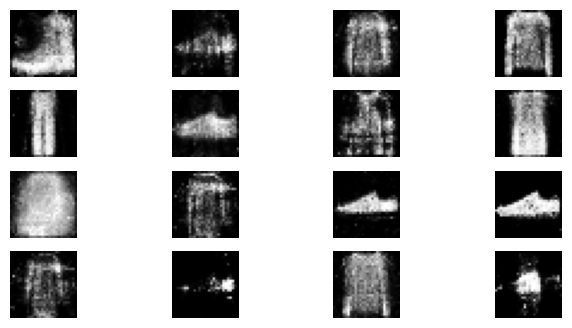

 78%|███████▊  | 39/50 [02:08<00:35,  3.22s/it]

Time for epoch 39 is 3.9544565677642822 sec
Training started with  epoch 40 with 469 batches...
Losses after epoch    40: generator 1.334, discriminator 0.984, real_score 67.92%, fake_score 32.77%


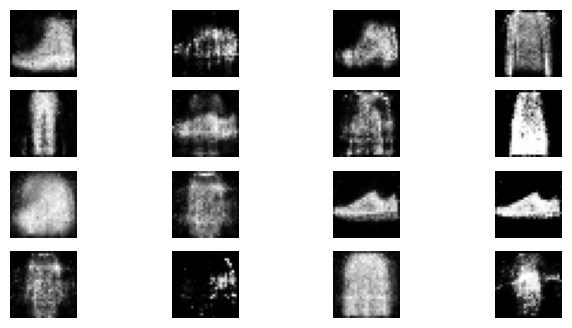

 80%|████████  | 40/50 [02:11<00:31,  3.13s/it]

Time for epoch 40 is 2.9318628311157227 sec
Training started with  epoch 41 with 469 batches...
Losses after epoch    41: generator 1.825, discriminator 0.889, real_score 76.09%, fake_score 28.62%


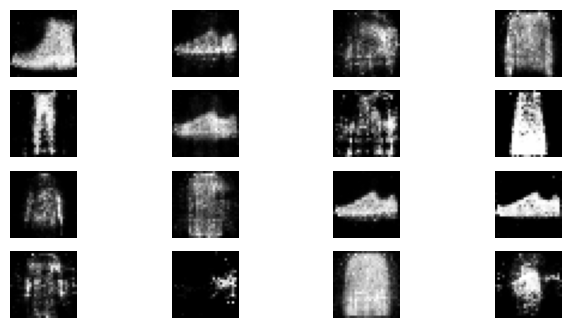

 82%|████████▏ | 41/50 [02:14<00:26,  2.98s/it]

Time for epoch 41 is 2.6208627223968506 sec
Training started with  epoch 42 with 469 batches...
Losses after epoch    42: generator 2.634, discriminator 0.646, real_score 84.39%, fake_score 20.25%


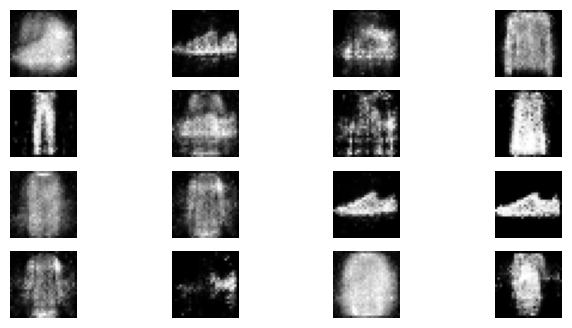

 84%|████████▍ | 42/50 [02:16<00:23,  2.88s/it]

Time for epoch 42 is 2.6594431400299072 sec
Training started with  epoch 43 with 469 batches...
Losses after epoch    43: generator 1.957, discriminator 0.960, real_score 68.84%, fake_score 25.84%


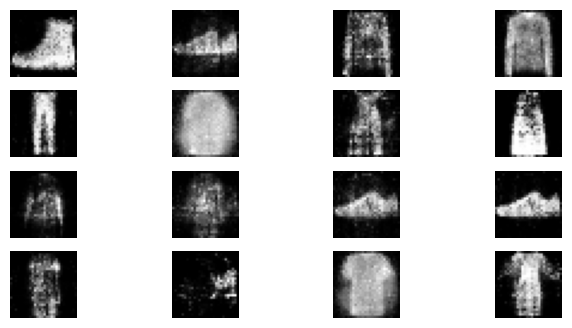

 86%|████████▌ | 43/50 [02:19<00:19,  2.82s/it]

Time for epoch 43 is 2.6550376415252686 sec
Training started with  epoch 44 with 469 batches...
Losses after epoch    44: generator 1.618, discriminator 0.873, real_score 77.71%, fake_score 29.99%


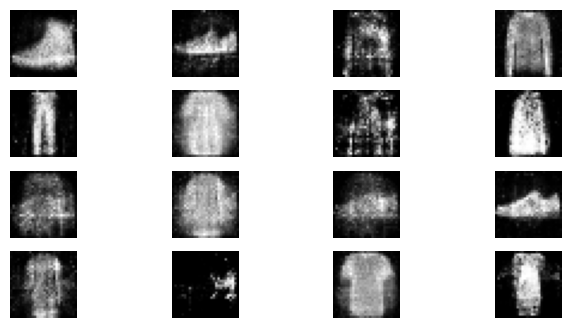

 88%|████████▊ | 44/50 [02:23<00:18,  3.15s/it]

Time for epoch 44 is 3.9041483402252197 sec
Training started with  epoch 45 with 469 batches...
Losses after epoch    45: generator 1.798, discriminator 0.832, real_score 75.69%, fake_score 24.96%


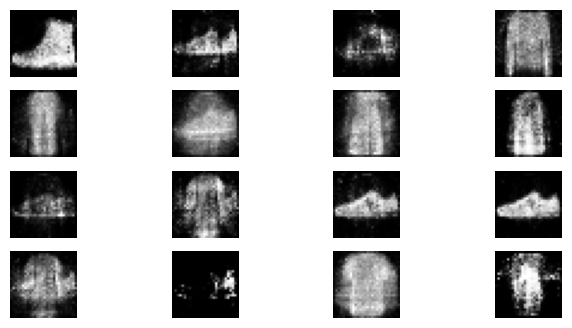

 90%|█████████ | 45/50 [02:26<00:15,  3.14s/it]

Time for epoch 45 is 3.102839469909668 sec
Training started with  epoch 46 with 469 batches...
Losses after epoch    46: generator 1.539, discriminator 1.045, real_score 70.32%, fake_score 31.90%


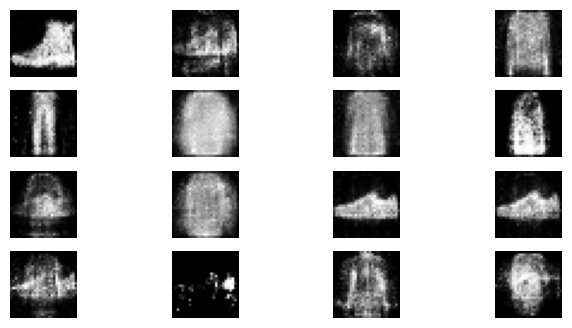

 92%|█████████▏| 46/50 [02:29<00:11,  2.99s/it]

Time for epoch 46 is 2.6454365253448486 sec
Training started with  epoch 47 with 469 batches...
Losses after epoch    47: generator 2.411, discriminator 0.677, real_score 76.34%, fake_score 18.05%


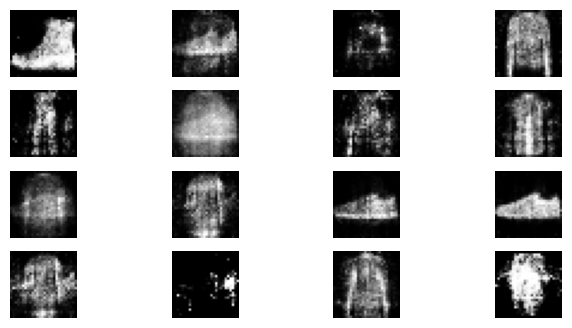

 94%|█████████▍| 47/50 [02:31<00:08,  2.88s/it]

Time for epoch 47 is 2.6280081272125244 sec
Training started with  epoch 48 with 469 batches...
Losses after epoch    48: generator 1.848, discriminator 0.766, real_score 74.71%, fake_score 23.95%


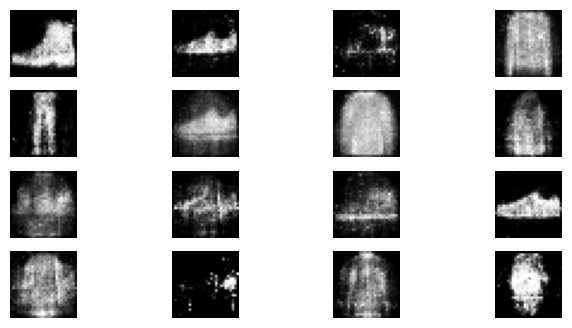

 96%|█████████▌| 48/50 [02:35<00:06,  3.06s/it]

Time for epoch 48 is 3.4753782749176025 sec
Training started with  epoch 49 with 469 batches...
Losses after epoch    49: generator 1.629, discriminator 1.047, real_score 66.28%, fake_score 28.36%


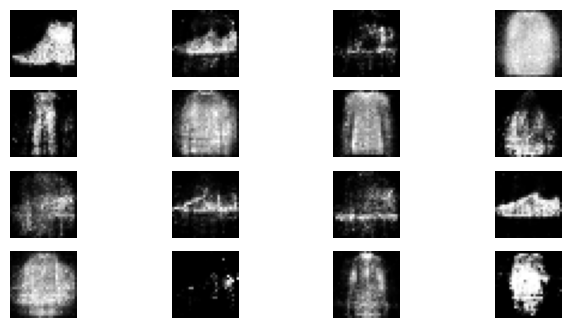

 98%|█████████▊| 49/50 [02:38<00:03,  3.22s/it]

Time for epoch 49 is 3.592498302459717 sec
Training started with  epoch 50 with 469 batches...
Losses after epoch    50: generator 1.968, discriminator 0.723, real_score 78.90%, fake_score 24.12%


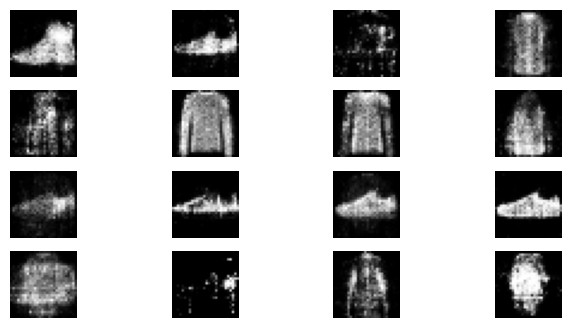

100%|██████████| 50/50 [02:42<00:00,  3.24s/it]

Time for epoch 50 is 3.3058278560638428 sec


In [62]:
gen_loss_epochs, disc_loss_epochs, real_score_list, fake_score_list = train(train_dataset, epochs = epochs)

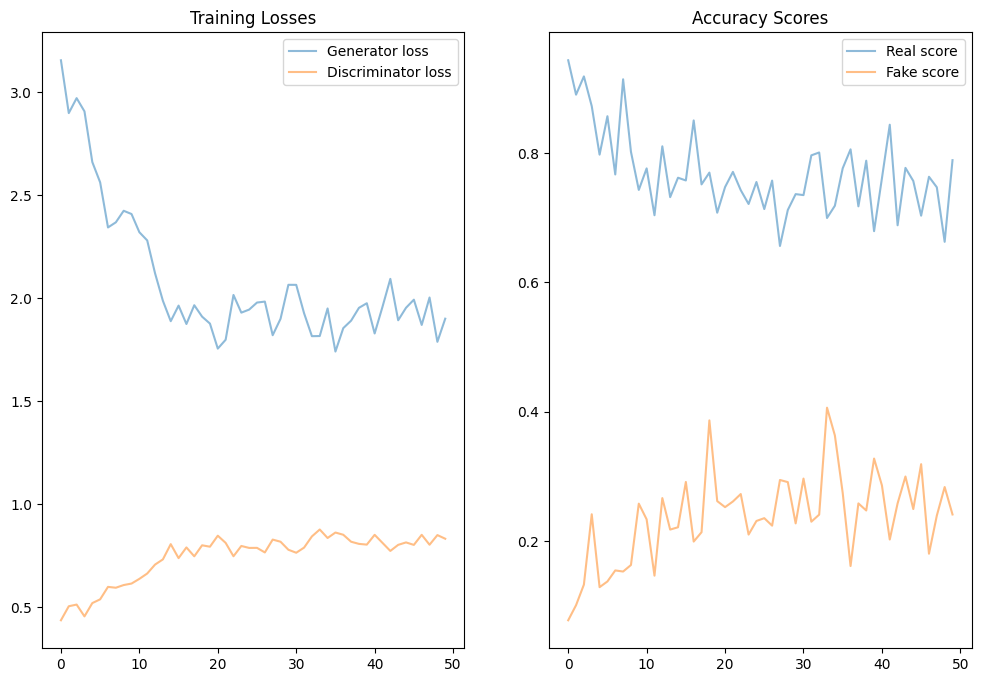

In [63]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (12, 8))

ax1.plot(gen_loss_epochs, label = 'Generator loss', alpha = 0.5)
ax1.plot(disc_loss_epochs, label = 'Discriminator loss', alpha = 0.5)
ax1.legend()

ax1.set_title('Training Losses')
ax2.plot(real_score_list, label = 'Real score', alpha = 0.5)
ax2.plot(fake_score_list, label = 'Fake score', alpha = 0.5)
ax2.set_title('Accuracy Scores')

ax2.legend()

In [ ]:
fig